# Section 9 - Web Scraping and Web Crawling
Data from websites are not always neatly organized. We call this **unstructured data**. Most webpages are rendered in **HTML**, a programming language designed for layout and formatting. But in order to understand how to work with unstructured data from websites we need to know a little bit of HTML. CodeAcademy has a great free [HTML tutorial](https://www.codecademy.com/learn/learn-html), which covers even more than what we need for this section. We are also going to use a little bit of **regular expressions** (or RegEx), which is a special string describing a search pattern. And here is a great [RegEx tutorial](https://regexone.com/).

Now that we know the basics of HTML, you should also learn how to **open the source code panel** of your web browser. If you are using Google Chrome, just press F12. If you are using Safari on a Mac, you need to **enable the developer menu**:
1. Click on *Safari Menu* > *Preferences* > *Advanced*
1. Check the *"show Develop menu in the menu bar"*
1. Now there a is a drop down menu called *Develop*, with the *view source* option.

In this notebook we are going to use some new libraries:
* **`requests`**: Allows to grab the source code and other characteristics of a webpage.
* **`BeaultifulSoup4`**: Interprets text as sorce code and lets you grab the parts you want.
* **`re`**: The RegEx module that is already built in python.

In [24]:
import requests
from bs4 import BeautifulSoup as bs
import re
import pandas as pd
from tqdm import tqdm

For now, our target is going to the **G1 website**.

https://g1.globo.com/

We can use the requests library to `get` the contents of the page.

In [2]:
response = requests.get('http://g1.globo.com')
type(response)

requests.models.Response

notice that the `get` method returns a specific object of the `requests` library. Let's take a look at the atributes of the object.

In [3]:
dir(response)

['__attrs__',
 '__bool__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__enter__',
 '__eq__',
 '__exit__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_content',
 '_content_consumed',
 '_next',
 'apparent_encoding',
 'close',
 'connection',
 'content',
 'cookies',
 'elapsed',
 'encoding',
 'headers',
 'history',
 'is_permanent_redirect',
 'is_redirect',
 'iter_content',
 'iter_lines',
 'json',
 'links',
 'next',
 'ok',
 'raise_for_status',
 'raw',
 'reason',
 'request',
 'status_code',
 'text',
 'url']

Try a few of these attributes on the next cell. The most important for us is going to be `.text` method.

In [4]:
response.text

'<!DOCTYPE HTML>\n<html lang="pt-br" itemscope itemtype="http://schema.org/WebPage"> <head><meta charset="utf-8"><meta http-equiv="x-ua-compatible" content="ie=edge,chrome=1"><meta name="viewport" content="width=device-width, initial-scale=1"><title>G1 - O portal de notícias da Globo</title><link rel="preconnect" href="https://s.glbimg.com"><link rel="preconnect" href="https://s2.glbimg.com"><link rel="preconnect" href="https://s3.glbimg.com"><link rel="preconnect" href="https://tags.globo.com"><link rel="preconnect" href="https://tags.tiqcdn.com"><link rel="preconnect" href="https://www.google-analytics.com"><meta name="title" content="G1 - O portal de notícias da Globo"><meta name="description" content="Últimas notícias de economia, política, carros, emprego, educação, ciência, saúde, cultura do Brasil e do mundo. Vídeos dos telejornais da TV Globo e da GloboNews."><meta rel="icon" type="image/jpeg" href="https://s2.glbimg.com/nMQRSo35mM4QdMphrT4FsjQuMeM=/32x32/smart/filters:strip_ic

We can use RegEx to search content in this page. For example, let's **grab all the URLs from G1 website**.

In [5]:
regex_html_url = '''href=["'](.[^"']+)["']'''  # RegEx for URLs
re.findall(regex_html_url, response.text)

['https://s.glbimg.com',
 'https://s2.glbimg.com',
 'https://s3.glbimg.com',
 'https://tags.globo.com',
 'https://tags.tiqcdn.com',
 'https://www.google-analytics.com',
 'https://s2.glbimg.com/nMQRSo35mM4QdMphrT4FsjQuMeM=/32x32/smart/filters:strip_icc()/s.glbimg.com/jo/g1/f/original/2018/05/23/favicon-g1.jpeg',
 'https://g1.globo.com/',
 'https://s2.glbimg.com/Nme7nzPOlSYd1wZQzw294kUVR4Y=/16x16/smart/filters:strip_icc()/s.glbimg.com/jo/g1/f/original/2018/05/23/favicon-g1.jpeg',
 'https://s2.glbimg.com/nMQRSo35mM4QdMphrT4FsjQuMeM=/32x32/smart/filters:strip_icc()/s.glbimg.com/jo/g1/f/original/2018/05/23/favicon-g1.jpeg',
 'https://s2.glbimg.com/HgQSI36Q2YVwzKwqPRAdK_AuZy8=/192x192/smart/filters:strip_icc()/s.glbimg.com/jo/g1/f/original/2018/05/23/favicon-g1.jpeg',
 'https://s2.glbimg.com/FuRy3SDTOpEJIivfVlsCRzQ7XFE=/57x57/smart/filters:strip_icc()/s.glbimg.com/jo/g1/f/original/2018/05/23/favicon-g1.jpeg',
 'https://s2.glbimg.com/aaAnfcAkozhA0CPrwxtMXUgmYOc=/72x72/smart/filters:strip_icc(

Notice that you can now write a program to visit all the avaible URLs from G1 home page and turn your webscrapper into a webcrawler.

Now, let's say we want to **grab the text from all the headlines**.

In [6]:
response = requests.get('http://g1.globo.com')
headlines = bs(response.content, 'html.parser').find_all('a', class_='feed-post-link gui-color-primary gui-color-hover')

print(len(headlines))

headlines

9


[<a class="feed-post-link gui-color-primary gui-color-hover" href="https://g1.globo.com/politica/noticia/2018/11/20/stf-autoriza-novas-diligencias-em-inquerito-sobre-aecio-neves.ghtml">STF autoriza Procuradoria a analisar informações bancárias relacionadas a Aécio no exterior</a>,
 <a class="feed-post-link gui-color-primary gui-color-hover" href="https://g1.globo.com/economia/noticia/2018/11/20/aumento-de-imposto-nao-afirma-paulo-guedes-futuro-ministro-da-economia.ghtml">Paulo Guedes diz que não haverá aumento de imposto e anuncia secretaria de privatizações</a>,
 <a class="feed-post-link gui-color-primary gui-color-hover" href="https://g1.globo.com/politica/noticia/2018/11/20/novo-ministro-da-saude-diz-que-atuacao-de-medicos-cubanos-parecia-convenio-entre-cuba-e-o-pt.ghtml">Mandetta é indicado futuro ministro da Saúde e diz que Mais Médicos parecia convênio Cuba-PT</a>,
 <a class="feed-post-link gui-color-primary gui-color-hover" href="https://g1.globo.com/politica/noticia/2018/11/20/

To grab the contents inside a HTML tag, use the `.get_text` method

In [7]:
print(type(headlines[0]), '\n')

print(headlines[0])

headlines[0].get_text()

<class 'bs4.element.Tag'> 

<a class="feed-post-link gui-color-primary gui-color-hover" href="https://g1.globo.com/politica/noticia/2018/11/20/stf-autoriza-novas-diligencias-em-inquerito-sobre-aecio-neves.ghtml">STF autoriza Procuradoria a analisar informações bancárias relacionadas a Aécio no exterior</a>


'STF autoriza Procuradoria a analisar informações bancárias relacionadas a Aécio no exterior'

In [8]:
for i in range(len(headlines)):
    print(headlines[i].get_text(), '\n')

STF autoriza Procuradoria a analisar informações bancárias relacionadas a Aécio no exterior 

Paulo Guedes diz que não haverá aumento de imposto e anuncia secretaria de privatizações 

Mandetta é indicado futuro ministro da Saúde e diz que Mais Médicos parecia convênio Cuba-PT 

Bolsonaro diz que Mandetta não é réu e só acusação 'robusta' tira ministro do governo 

Moro escolhe Maurício Valeixo como futuro diretor-geral da PF 

VALDO CRUZ: Bolsonaro mantém ministro de Temer e quer sintonia da CGU com Moro 

10 ministros do futuro governo já foram anunciados; veja quais 

Governo publica edital com 8,5 mil vagas para substituir médicos cubanos 

Delegacia de combate à corrupção extinta em PE tenta concluir 5 inquéritos de 1,6 mil abertos 



---
# Scraping Emails

[Students from the masters of economics in PUC-Rio](http://www.econ.puc-rio.br/pessoas/alunos-mestrado)

In [14]:
response = requests.get('http://www.econ.puc-rio.br/pessoas/alunos-mestrado')

regExpEmail = '[\w\.-]+@[\w\.-]+' # RegEx for email
re.findall(regExpEmail, response.text)

['alex.carmar93@gmail.com',
 'alex.carmar93@gmail.com',
 'aliceodrumond@gmail.com',
 'aliceodrumond@gmail.com',
 'arfarias@gmail.com',
 'arfarias@gmail.com',
 'biaribeiro11@hotmail.com',
 'biaribeiro11@hotmail.com',
 'carlosalbertobdc@gmail.com',
 'carlosalbertobdc@gmail.com',
 'carloshg96@gmail.com',
 'carloshg96@gmail.com',
 'caterina.vieira@gmail.com',
 'caterina.vieira@gmail.com',
 'cesar.zambrano@live.com',
 'cesar.zambrano@live.com',
 'daniel_cardoso@poli.ufrj.br',
 'daniel_cardoso@poli.ufrj.br',
 'doine.daniel@gmail.com',
 'doine.daniel@gmail.com',
 'daniel.mar.coutinho@gmail.com',
 'daniel.mar.coutinho@gmail.com',
 'davi.doneda@gmail.com',
 'davi.doneda@gmail.com',
 'efagundesdecarvalho@gmail.com',
 'efagundesdecarvalho@gmail.com',
 'eduardo.leitner@gmail.com',
 'eduardo.leitner@gmail.com',
 'felipekotinda@gmail.com',
 'felipekotinda@gmail.com',
 'fernandolmc@al.insper.edu.br',
 'fernandolmc@al.insper.edu.br',
 'gabrielgranato@gmail.com',
 'gabrielgranato@gmail.com',
 'kaian.ar

If you click on the name of a student, you can see that the URL ends with something that looks like an ID number. The link for the first one is 

http://www.econ.puc-rio.br/pessoas/perfil/1

If you keep adding 1 to this ID number, you will go through everybody that is registered in the department of economics from PUC-Rio.

Not all the ID numbers are valid. For example, number 17 returns an error

http://www.econ.puc-rio.br/pessoas/perfil/17

In [9]:
requests.get('http://www.econ.puc-rio.br/pessoas/perfil/17').text

'<br />\n<b>Fatal error</b>:  Call to a member function getNucleosId() on boolean in <b>/var/www/Puc-econ/apps/frontend/modules/nucleos/actions/actions.class.php</b> on line <b>87</b><br />\n'

We are going to use this in our favor. Whenever the string "fatal error" is in the response we are going to skip that ID number.

In [20]:
re.findall('Fatal error', requests.get('http://www.econ.puc-rio.br/pessoas/perfil/17').text)

['Fatal error']

In case the page exists, we use `beatifulsoup` to grab the HTML tag of the person's name and a regular expression search to get the email. We are searching for different information using different methods for a reason. The person's name is always under the `<h5>` HTML tag, while several other information are under the same tag `<a>`.

In [21]:
response = requests.get('http://www.econ.puc-rio.br/pessoas/perfil/18')

soup = bs(response.content.decode('utf-8','ignore'), 'html.parser')

In [22]:
all_a = soup.find_all('a')
for p in all_a:
    print(p.get_text())

Área do Aluno
English

Home
Graduação
Pós-Graduação
Mestrado Profissional
Pessoas
Seminários
Contato
Fund-Raising
Na
                    mídia
Publicações
Artigos em periódicos
Livros e capítulos
Textos para discussão
Artigos em jornais e
                            revistas
Artigos de seminários
Dissertação de Mestrado
Dissertação de Mestrado
                            Profissional
Tese de Doutorado
Monografias de final de
                            cursos
Professores do Quadro Principal
Professores do Quadro Complementar
Professores Visitantes
Alunos de Doutorado
Alunos de Mestrado
Alunos do Mestrado Profissional
Equipe Administrativa
Professores do quadro complementar
cvianac@econ.puc-rio.br
Lattes
Site Pessoal
Do People Understand Monetary Policy? 
The Persistent Effects of a False News Shock
Aggregation and the PPP Puzzle in a Sticky-Price Model
Leia mais


Piloti


Here is a single example

In [23]:
print(soup.find_all('h5')[0].get_text())

print(re.findall(regExpEmail , response.text)[0])

Carlos Viana de  Carvalho
cvianac@econ.puc-rio.br


Now, all we have to do is iterate on the ID of the URL and save the name and email, but we have to handle two types of errors:
* We skip the iteration if the page is not avilable. To handle this we check if the string "fatal error" is on the page.
* If there is no email on the page, we have to save a blank. To handle this problem we use the `try-except` clause.

In [25]:
# Creates empty lists that are going to store the data
Nomes = []
Emails = []

# loops for IDs from 1 to 2000
for i in tqdm(range(1, 3000)):    
    
    #if i%250 == 0:
     #   print('buscando pagina', i)
    
    response = requests.get('http://www.econ.puc-rio.br/pessoas/perfil/' + str(i))
    
    if 'Fatal error' in re.findall('Fatal error', response.text):
        continue  # skips to the next iteration
    else:
        nome_i = bs(response.content.decode('utf-8','ignore'), 'html.parser').find_all('h5')[0].text
        
        try:
            email_i = re.findall(regExpEmail, response.text)[0]
        except IndexError:
            email_i = ''
  
        Nomes.append(nome_i)
        Emails.append(email_i)
        
EmailsPUC = pd.DataFrame(data={'Nomes':Nomes, 'Emails':Emails}).sort_values('Nomes')

100%|██████████████████████████████████████████████████████████████████████████████| 1999/1999 [03:23<00:00,  9.38it/s]


In [27]:
EmailsPUC

,Nomes,Emails
431,A.K.Dutt,
1135,Adolfo de Vasconcelos Farjalla,
1291,Adriana Pereira Raupp,
23,Adriana Schor,aschor@usp.br
121,Afonso Sant'Anna Bevilaqua,afonso.bevilaqua@gmail.com
247,Alan Seixas Bello Moreira,alan.moreira@simon.rochester.edu
1569,Alan Towersey,
1136,Alberto Max Kestelman,
122,Alberto Octavio Espejo Ortega,
1367,Alberto Ribeiro Guimarães,


In [36]:
EmailsPUC[EmailsPUC['Nomes'].str.contains('Gustavo')].dropna().sort_values('Nomes')

,Nomes,Emails
189,Carlos Gustavo Machicado Salas,guccio@hotmail.com
760,Gustavo Amoras Souza Lima,gustslima@gmail.com
1011,Gustavo Barbosa de Almeida,
1066,Gustavo Bicharra Pinto,
739,Gustavo Cicchelli de Sá Vieira,gustavocsv@gmail.com
526,Gustavo Curi Amarante,gusamarante@gmail.com
784,Gustavo D'Albuquerque Andrade,gustandrade@yahoo.com.br
583,Gustavo Ferreira Martins,
535,Gustavo França de Seixas Duarte,gusfranca@gmail.com
804,Gustavo Gonzaga Borges,


One way to protect yourself from webscraping is to not write your email **explicitly**. Here is an example from Marcos Lopez de Prado [website](http://www.quantresearch.info/).


---
## Query Strings: URLs with Parameters
Everything after "?" is the query string and it is meant to contain data that does not fit within a URL’s normal hierarchical path structure

https://www.google.com.br/search?q=pesquisa+eleitoral+bolsonaro&num=3&as_sitesearch=g1.com.br

* query string comes at the end of a URL, starting with a single question mark, “?”.
* Parameters are provided as key-value pairs and separated by an ampersand, “&”.
* The key and value are separated using an equals sign, “=”.

In [ ]:
url = 'https://www.google.com.br/search?q=pesquisa+eleitoral+bolsonaro&num=3&as_sitesearch=g1.com.br'
res = requests.get(url)
res.text

We want an easy way to change the parameters of our search. Luckily, the `requests` library already has a functionality for URL queries.

In [70]:
url = 'https://www.google.com.br/search'

param_dict = {'q': 'programa+de+governo', 
              'num': '3', 
              'as_sitesearch': 'g1.com.br'}

response = requests.get(url, params=param_dict)

response.url

'https://www.google.com.br/search?q=programa%2Bde%2Bgoverno&num=3&as_sitesearch=g1.com.br'

## Practical Example - Derivatives Settlement Prices from B3
An applied example of this is going to be relevant for is scraping sttlement prices from the B3 derivatives.

http://www2.bmf.com.br/pages/portal/bmfbovespa/lumis/lum-sistema-pregao-enUS.asp?Data=10/01/2018&Mercadoria=DOL

In [71]:
url = 'http://www2.bmf.com.br/pages/portal/bmfbovespa/lumis/lum-sistema-pregao-enUS.asp'
param_dict = {'Data': '10/01/2018', 'Mercadoria': 'DOL'}
r = requests.get(url, params=param_dict)
r.text

'\r\n\r\n\r\n<!doctype html>\r\n<html class="no-js" lang="en-us">\r\n<head>\r\n<meta http-equiv="Content-Type" content="text/html; charset=iso-8859-1">\r\n<meta name="viewport" content="width=device-width, initial-scale=1.0" />\r\n<link rel="stylesheet" href="css/foundation.css" />\n<link rel="stylesheet" href="css/jquery.ui.datepicker.css" />\n<script src="js/vendor/modernizr.js"></script>\r\n\r\n<script type="text/javascript">\r\nfunction Retroativo(theForm) {\r\n    if(!CkDate(theForm.dData1, theForm.dData1.value))\r\n        {\r\n            \r\n                alert("Select the query period.");\r\n            \r\n            theForm.dData1.focus();\r\n            theForm.dData1.select();\r\n            return false;\r\n        }\r\n    if(!CkDate(theForm.dData2, theForm.dData2.value))\r\n        {\r\n            \r\n                alert("Select the query period.");\r\n            \r\n            theForm.dData2.focus();\r\n            theForm.dData2.select();\r\n            return

---
# Webdrivers
First we need to install the [**selenium webdriver library**](https://www.seleniumhq.org/projects/webdriver/). This library allows you to command the web browsers. We will use **Google Chrome** as our web browser, so we need the [**Chrome Driver**](https://sites.google.com/a/chromium.org/chromedriver/downloads)

In [120]:
from selenium import webdriver
import datetime as dt
import time as time
import os

In [121]:
driver_options = webdriver.ChromeOptions()

browser = webdriver.Chrome(r'\\bw2k1201app\groupbrw$\BWGI\Thiago Barros\Drivers\chromedriver', 
                           chrome_options=driver_options)

browser.get(r'https://www3.bcb.gov.br/expectativas/publico/consulta/serieestatisticas')

select the indicator

In [122]:
xpath = r'//*[@id="indicador"]/option[5]'
browser.find_element_by_xpath(xpath).click()

Select the price index

In [123]:
xpath = r'//*[@id="grupoIndicePreco:opcoes_5"]'
browser.find_element_by_xpath(xpath).click()

select the metric

In [124]:
xpath = r'//*[@id="calculo"]/option[3]'
browser.find_element_by_xpath(xpath).click()

Select the periodicity

In [125]:
xpath = r'//*[@id="periodicidade"]/option[3]'
browser.find_element_by_xpath(xpath).click()

Fill the dates

In [126]:
initial_date = dt.date(2018, 1, 10)
xpath = r'//*[@id="tfDataInicial1"]'
browser.find_element_by_xpath(xpath).send_keys(initial_date.strftime('%d/%m/%Y'))

end_date = dt.date(2018, 11, 16)
xpath = r'//*[@id="tfDataFinal2"]'
browser.find_element_by_xpath(xpath).send_keys(end_date.strftime('%d/%m/%Y'))

Fill initial year and final year

In [127]:
xpath = r'//*[@id="form4"]/div[2]/table/tbody[3]/tr/td[2]/select/option[2]'
browser.find_element_by_xpath(xpath).click()

# trick - always grabs the last element
xpath = r'//*[@id="form4"]/div[2]/table/tbody[3]/tr/td[4]/select'
selection = browser.find_element_by_xpath(xpath)
selection.click()
options = selection.find_elements_by_tag_name('option')
options[len(options) - 1].click()

click the download button

In [128]:
xpath = r'//*[@id="btnXLSa"]'
browser.find_element_by_xpath(xpath).click()

download_save_time = dt.datetime.now()  # saves the time the file was downloaded

Get the default download directory

Probably only works on windows

In [129]:
username = os.getlogin()
download_path = r'C:\Users\%(user)s\Downloads' % {'user': username}
download_path

'C:\\Users\\gamarante\\Downloads'

Explain the walk method
dirpath
dirname
filename

In [130]:
list(os.walk(download_path))

[('C:\\Users\\gamarante\\Downloads',
  [],
  ['001358-000049-025.pdf',
   '1+1=2(1).pdf',
   '1+1=2.pdf',
   '14597.pdf',
   '2011-Risk_parity_(risk_budgeting)-Main_References.pdf',
   '20180823115890.8254358.xls',
   '201808281119420.8531458.xls',
   '20180910.xls',
   '2018_08.zip',
   '358 - InfoPLD_2018_08_sem2.pdf',
   '367 - InfoPLD_2018_10_sem2.pdf',
   '369 - InfoPLD_2018_10_sem4.pdf',
   '67036-158953-1-PB.pdf',
   '76 - Info PLD_Agosto18.pdf',
   '78 - Info PLD_Outubro18 (1).pdf',
   '78 - Info PLD_Outubro18 (2).pdf',
   '78 - Info PLD_Outubro18.pdf',
   '79 - Info PLD_Novembro18.pdf',
   'ACMTermPremium.xls',
   'Agenda 2019 - Sumário -.pdf',
   'Alt Thinking 2Q18 Active vs Passive Investing.pdf',
   'Alternative Risk Premia A Closer Look.pdf',
   'An Alternative Future Part I.pdf',
   'An Alternative Future Part II.pdf',
   'Anaconda3-5.2.0-Windows-x86_64.exe',
   'ATVMCM4 (1).xls',
   'ATVMCM4 (2).xls',
   'ATVMCM4.xls',
   'Audition_The_Fools_Who_Dream.pdf',
   'Bali, Tu

Look for the files in the download path

In [133]:
for (dirpath, dirnames, filenames) in os.walk(download_path):
    
    for f in filenames:
    
        if 'Séries de estatísticas' in f:
            file_save_time = os.path.getmtime(dirpath + '\\' + f)
            file_save_time = dt.datetime.fromtimestamp(file_save_time)
            
            if file_save_time > save_time:
                file_path = dirpath + '\\' + f
                
print(file_path)

C:\Users\gamarante\Downloads\Séries de estatísticas (13).xls


read the file and clean the dataframe

In [157]:
df = pd.read_excel(file_path, skiprows=1, na_values=[' '])

df['Data'] = pd.to_datetime(df['Data'], dayfirst=True)
df = df.set_index('Data')
df

,2017,2018,2019,2020,2021,2022
Data,,,,,,
2018-01-02,2.79,3.96,4.25,4,4.00,NaN
2018-01-03,2.79,3.95,4.25,4,4.00,NaN
2018-01-04,2.79,3.95,4.25,4,4.00,NaN
2018-01-05,2.79,3.95,4.25,4,4.00,NaN
2018-01-08,2.79,3.95,4.25,4,4.00,NaN
2018-01-09,2.79,3.95,4.25,4,4.00,NaN
2018-01-10,NaN,3.94,4.25,4,4.00,4.00
2018-01-11,NaN,3.94,4.25,4,4.00,4.05
2018-01-12,NaN,3.95,4.25,4,4.00,4.00


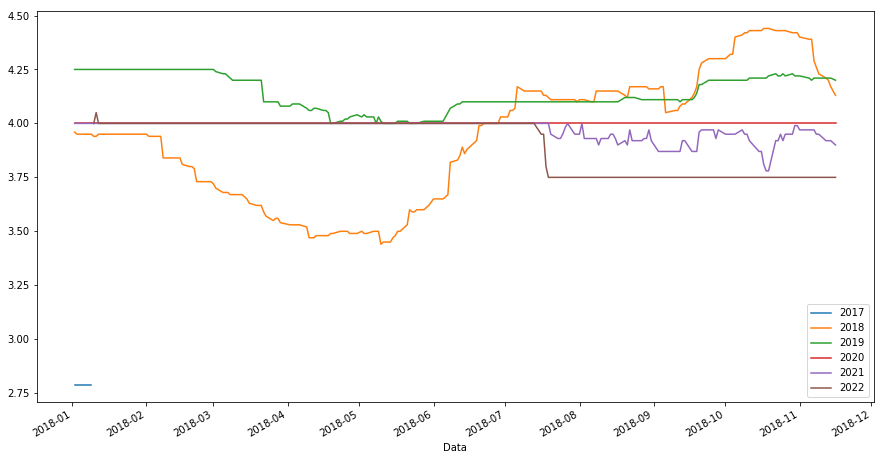

In [158]:
import matplotlib.pyplot as plt
df.plot(figsize=(15, 8))
plt.show()

All together now

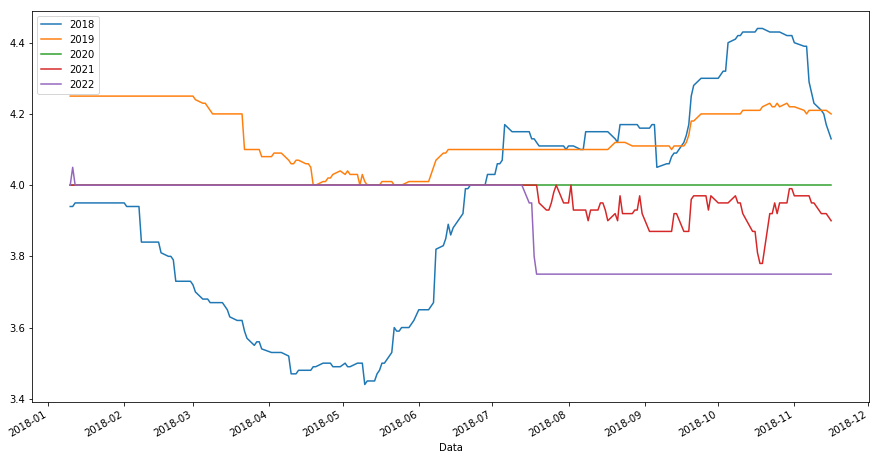

In [160]:
driver_options = webdriver.ChromeOptions()

browser = webdriver.Chrome(r'\\bw2k1201app\groupbrw$\BWGI\Thiago Barros\Drivers\chromedriver', 
                           chrome_options=driver_options)

browser.get(r'https://www3.bcb.gov.br/expectativas/publico/consulta/serieestatisticas')

xpath = r'//*[@id="indicador"]/option[5]'
browser.find_element_by_xpath(xpath).click()

xpath = r'//*[@id="grupoIndicePreco:opcoes_5"]'
browser.find_element_by_xpath(xpath).click()

xpath = r'//*[@id="calculo"]/option[3]'
browser.find_element_by_xpath(xpath).click()

xpath = r'//*[@id="periodicidade"]/option[3]'
browser.find_element_by_xpath(xpath).click()

initial_date = dt.date(2018, 1, 10)
xpath = r'//*[@id="tfDataInicial1"]'
browser.find_element_by_xpath(xpath).send_keys(initial_date.strftime('%d/%m/%Y'))

end_date = dt.date(2018, 11, 16)
xpath = r'//*[@id="tfDataFinal2"]'
browser.find_element_by_xpath(xpath).send_keys(end_date.strftime('%d/%m/%Y'))

xpath = r'//*[@id="form4"]/div[2]/table/tbody[3]/tr/td[2]/select/option[2]'
browser.find_element_by_xpath(xpath).click()

# trick - always grabs the last element
xpath = r'//*[@id="form4"]/div[2]/table/tbody[3]/tr/td[4]/select'
selection = browser.find_element_by_xpath(xpath)
selection.click()
options = selection.find_elements_by_tag_name('option')
options[len(options) - 1].click()

xpath = r'//*[@id="btnXLSa"]'
browser.find_element_by_xpath(xpath).click()

download_save_time = dt.datetime.now()  # saves the time the file was downloaded

time.sleep(6)  # give some time for the download to finish

browser.close()

username = os.getlogin()
download_path = r'C:\Users\%(user)s\Downloads' % {'user': username}

for (dirpath, dirnames, filenames) in os.walk(download_path):
    
    for f in filenames:
    
        if 'Séries de estatísticas' in f:
            file_save_time = os.path.getmtime(dirpath + '\\' + f)
            file_save_time = dt.datetime.fromtimestamp(file_save_time)
            
            if file_save_time > save_time:
                file_path = dirpath + '\\' + f
                
df = pd.read_excel(file_path, skiprows=1, na_values=[' '])

df['Data'] = pd.to_datetime(df['Data'], dayfirst=True)
df = df.set_index('Data')

df.plot(figsize=(15, 8))
plt.show()